<a href="https://colab.research.google.com/github/geovaniGomes/geovaniGomes/blob/main/MachineLearning/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Fraudes em Cartões de Crédito

Atualmente, o principal meio de pagamento adotado por consumidores é o cartão. Seja de crédito ou débito, a facilidade e segurança são vantagens levadas em conta por clientes na hora de pagar suas compras. 

Portanto, para o varejista é imprescindível contar com estratégias para controlar essas vendas e impedir que possa acontecer alguma fraude em cartão de crédito.

Como a quantidade de vendas realizadas em cartão cresce a cada dia, aumenta também o interesse em fraudar esse processo e tirar vantagem em alguma situação. 

Cabe ao varejista o monitoramento constante e a adoção de processos para evitar que a fraude em cartão de crédito aconteça e prejudique suas vendas.

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/900.jpg" width="60%"></p>

Dentre essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acarretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas europeias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/54.jpg" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [ ]:
# caso você não tem essa biblioteca instalada use o comando abaixo.
!pip install imblearn -q

In [1]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import NearMiss
from mlxtend.classifier import EnsembleVoteClassifier

from sklearn import (
    model_selection,
    preprocessing,
    linear_model,
    ensemble,
    naive_bayes,
    tree
)
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    recall_score
)

Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [3]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)


Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

## Análise Exploratória

Abordar tópicos/informações como:

* Ver as 5 primeiras entradas
* Ver o resumo estatístico do dataframe
* Verificar se há valores ausentes
* Plotar um gráfico de barras (ou countplot) para ver o balanceamento do *dataset*
* Plotar os seguintes histogramas:
    * Variável `Time`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
    * Variável `Amount`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
* Plotar um `boxplot` para a variável `Amount` quando houve fraude (`Class == 1`)
* Plotar uma matriz de correlação

In [ ]:
# Visualizando as 5 primeiras linhas 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Verificando a distribuição dos dados

In [ ]:
# Resumo estatístico do Dataframe
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


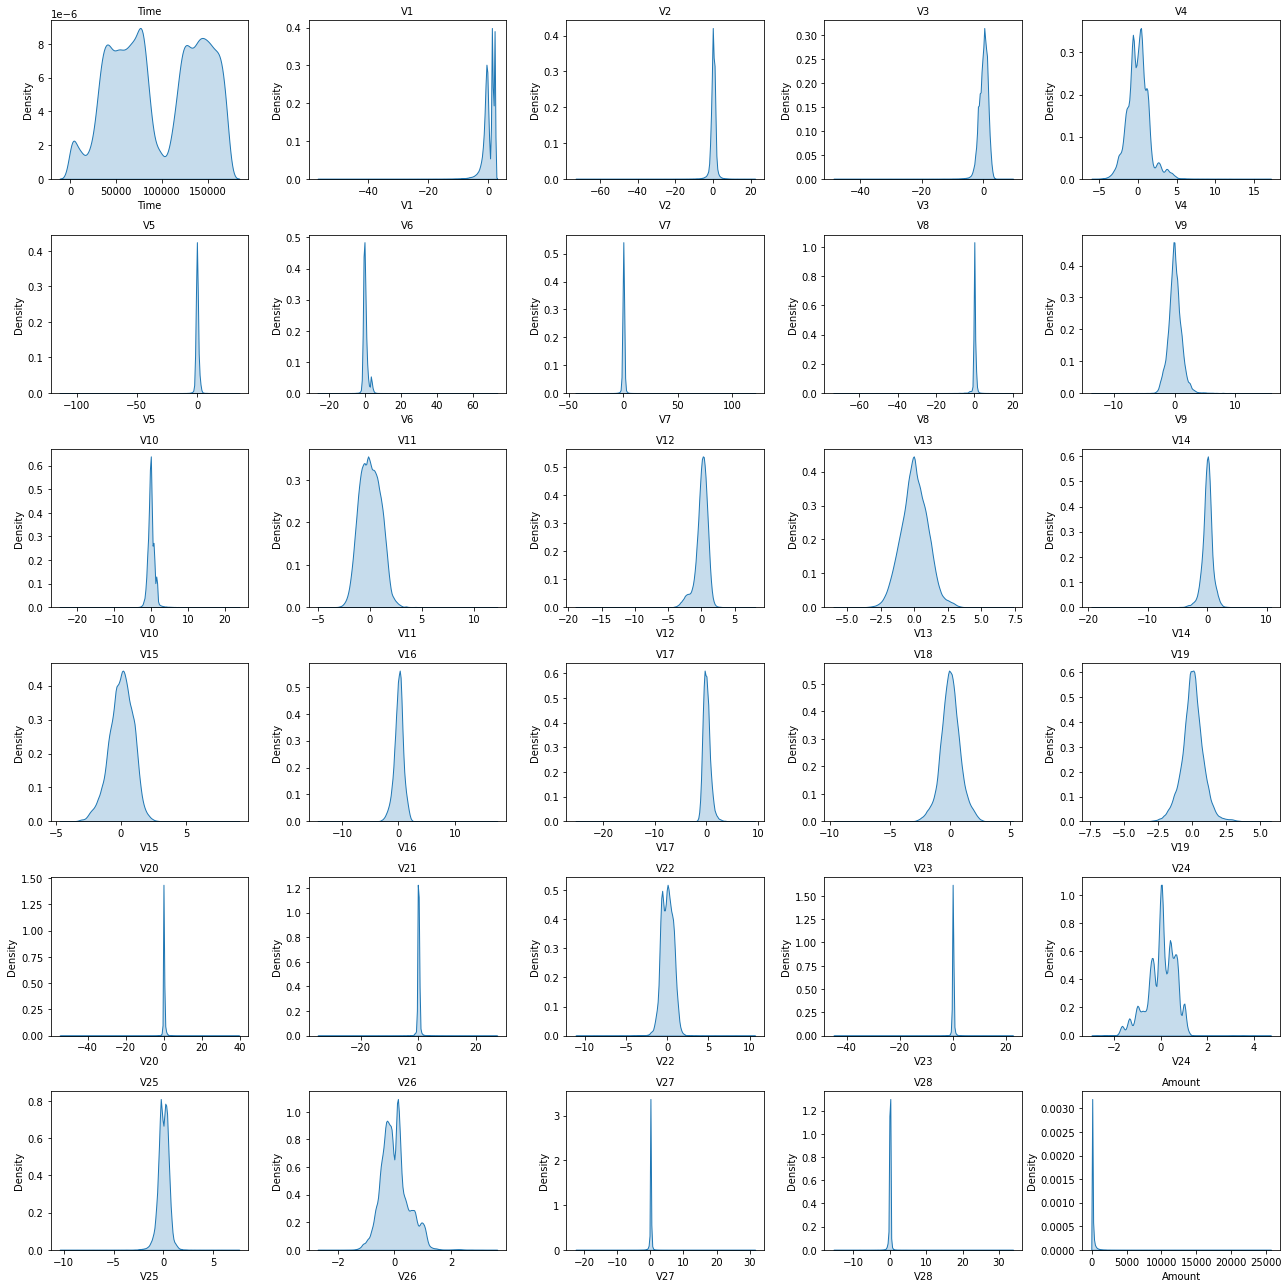

In [ ]:
columns = df.drop(['Class'], axis=1).columns

fig, ax = plt.subplots(nrows=6, ncols=5, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for column in columns:
    idx += 1
    plt.subplot(6, 5, idx)
    sns.kdeplot(x=df[column],shade=True)
    plt.title(column, fontsize=10)
plt.tight_layout()

plt.savefig('distribuicao_variaveis.png', format='png')

Para entendermos o describe de uma forma mais simples e tranquila, foi plotado um gráfico  de distribuição para cada coluna de V1 a V28. 

Nesse gráfico mostra como esta a distribuição das colunas. Para termos uma visão melhor se o conjunto de dados está bem distribuído ou não.
Em nosso caso, este conjunto de dados apesar de que foi feito um pré-processamento ele não se encontra bem distribuído. Por termos colunas fortemente a esquerda, outras pela direita e algumas centralizadas. 




In [ ]:
# Visualizando valores ausentes
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Gráfico sobre o balanceamento do dataset

0    0.998273
1    0.001727
Name: Class, dtype: float64


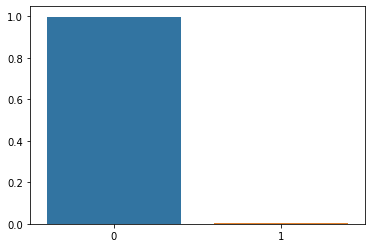

In [ ]:
representation_class = df['Class'].value_counts(normalize= True)
print(representation_class)
sns.barplot(x=representation_class.index, y=representation_class.values);
plt.savefig('balanceamento_classes.png', format='png')

Sobre o balanceamento `99%` das representações, são classes de transações normais. E apenas `1%` são de fraudes. Essas classes que informam se houve ou não fraudes estão desbalanceadas. E isso é ruim para o nosso modelo de classificação. Devido uma das classes terem mais representações que outras. Nosso modelo fica enviesado podendo errar bastante nas classificações.

Iremos tratar isso mais adiante.

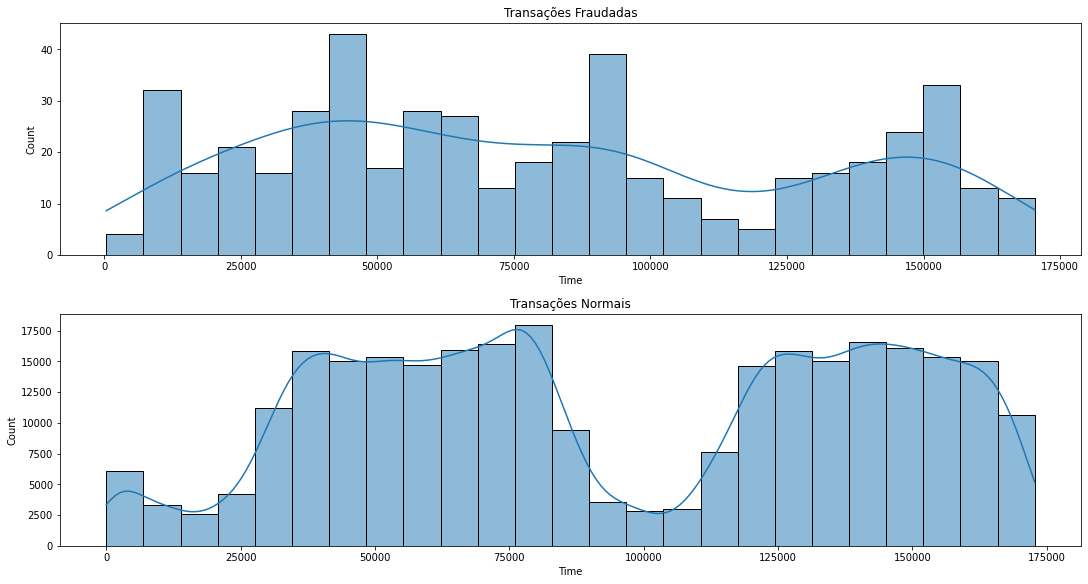

In [ ]:
# Definindo DataFrames separados por tipo de transação
df_transacoes_fraudadas = df[df['Class']==1]
df_transacoes_normais = df[df['Class']==0]

# Definindo subplots para os plots de histrogramas.
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15, 8), constrained_layout=True)
ax1.set_title("Transações Fraudadas")
sns.histplot(data=df_transacoes_fraudadas, x="Time", bins=25, ax=ax1, kde=True)

ax2.set_title("Transações Normais")
sns.histplot(data=df_transacoes_normais, x="Time", bins=25, ax=ax2, kde=True)
plt.show()

Nesse gráfico, plotamos dois histogramas para as transações normais e fraudulentas.
Em transações normais temos duas concentrações onde o tempo que ficam de um pouco acima de 25000 até 75000. E a segunda fica entre 125000 e um pouco acima de 150000.

Já no histograma de transações fraudadas, temos picos isolados de tempo de transação.

### Visualizando outliers dos montantes quando a transação for fraudada

Mediana: 9.25
Valor mínimo: 0.0


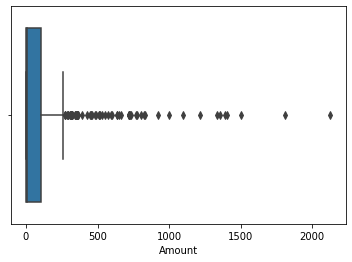

In [ ]:
print(f"Mediana: {df_transacoes_fraudadas['Amount'].median()}")
print(f"Valor mínimo: {df_transacoes_fraudadas['Amount'].min()}")
sns.boxplot(data=df_transacoes_fraudadas, x='Amount');


Para esse cenário, temos uma mediana de montantes de 9.25. Ou seja valores muito baixos de Q3 onde temos a maior parte dos valores como outliers.
Conclui-se que quando é uma transação, seus valores mais recorrentes são próximos de 9 e os exorbitantes são acima de 100.

### Verificando outliers

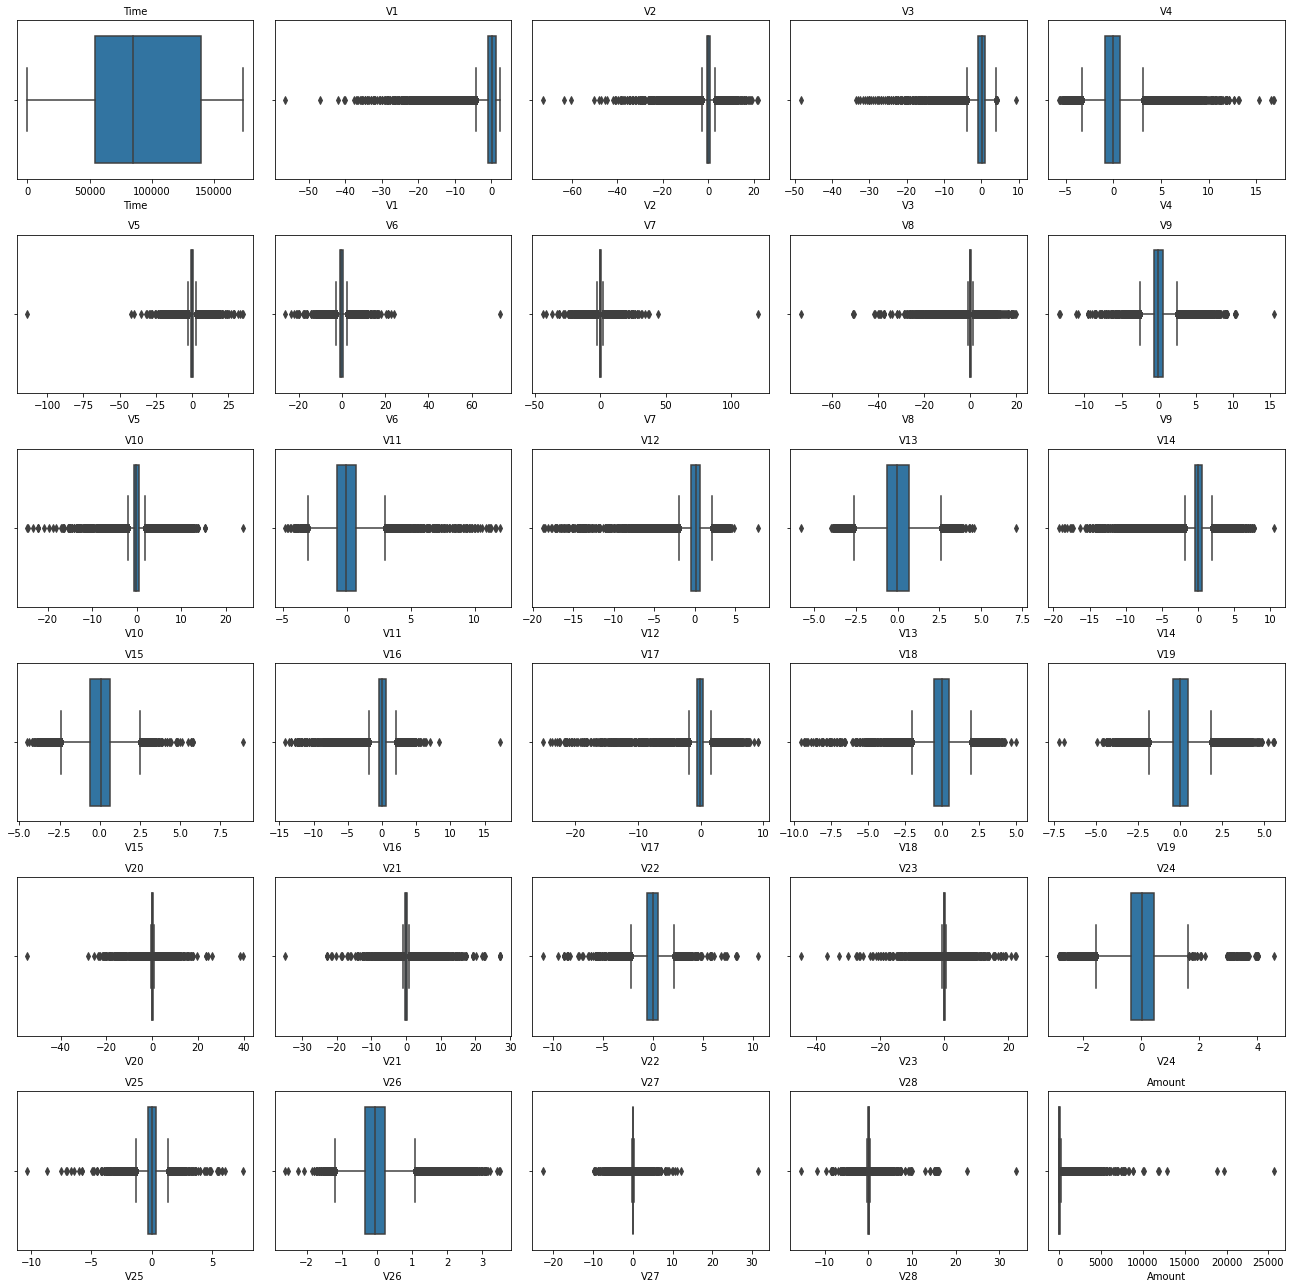

In [ ]:
columns = df.drop(['Class'], axis=1).columns

fig, ax = plt.subplots(nrows=6, ncols=5, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for column in columns:
    idx += 1
    plt.subplot(6, 5, idx)
    sns.boxplot(data=df, x=df[column])
    plt.title(column, fontsize=10)
plt.tight_layout()

plt.savefig('verificando_outliers.png', format='png')

Esse procedimento, segue a mesma lógica de quando plotamos um gráfico para observar a distribuição dos dados.

Nessa etapa observamos que exceto a coluna `Time`, todas as colunas possuem outliers. Sejam eles acima ou abaixo dos quartéis.

### Correlações entre as variáveis

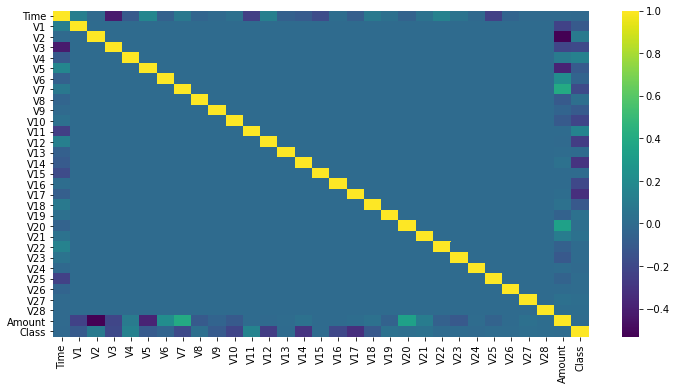

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap='viridis');

Nesse gráfico de Heatmap é exibido todas correlações entre as variáveis. Sejam elas positivas, negativas ou neutras.

Nessa etapa, não conseguimos observar uma correlação clara entre as variáveis. Devido a má distribuição dos dados e os outliers presentes.

Para termos uma visualização consistente, teriamos que normalizar melhor esses dados para aí sim termos uma correlação mais clara.

## Limpeza dos dados

Nessa fase de limpezas dos dados, criaremos uma classe que irá compor todos os métodos nescessários para a limpeza do DataFrame.

Nessa classe teremos um método de copiar o dataframe. Não é muito conveniente aplicar técnicas em cima do dataframe original. Caso aconteca algum comportamento diferente, nós não perderemos os dados originais. 

E um método de remover outliers utilizando a técnicas dos quartis.

Essa técnica afirma que um dado é um outlier quando ele é maior que 1,5*FIQ acima do terceiro quartil ou abaixo do primeiro quartil. Em outras palavras, outliers baixos estão abaixo de Q1- 1,5*FIQ. E outliers altos estão acima de Q3 +1,5*FIQ.

In [4]:
class DataClean(object):

  def copy_dataFrame(self,data_frame):    
    return data_frame.copy()

  def remove_outliers(self, df, columns_name):

     for column in columns_name:
        # identificando os outliers
        q1 = df[column].quantile(.25)
        q3 = df[column].quantile(.75)
        IQR = q3 - q1

        # definindo os limites                                       
        superior = q3 + 1.5 * IQR
        inferior = q1 - 1.5 * IQR

        df.drop(df[df[column]> superior].index, axis=0, inplace=True)
        df.drop(df[df[column]< inferior].index, axis=0, inplace=True)

     return df

  def remove_outliers_columns(self, df, column):
        # identificando os outliers
        q1 = df[column].quantile(.25)
        q3 = df[column].quantile(.75)
        IQR = q3 - q1

        # definindo os limites                                       
        superior = q3 + 1.5 * IQR
        inferior = q1 - 1.5 * IQR

        df.drop(df[df[column]> superior].index, axis=0, inplace=True)
        df.drop(df[df[column]< inferior].index, axis=0, inplace=True)
        return df
clean_data =DataClean()

#### Possível tratamento dos outliers



Nessa parte analizaremos se é benéfico ou nao removelos.

A idéia é fazer algo parecido com teste de hipótese. Onde irá ter três perguntas (em nosso caso) para nos ajudar a tomar uma desição.

O teste que faremos é: 
 * **TH 1- É revelante limpar os outliers?**
 * **TH 2 Ao remover os outliers, qual seria o impácto nos modelos de machine Learning ?**
 
 * **TH 3- Qual é o impacto de trinarmos os modelos com os outliers?** 

## Preparação dos Dados

* Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`)
* Dividir o conjunto de dados entre treino e teste
* Balancear o conjunto de dados

Para isso seguiremos a mesma lógica de estruturação da classe de Limpeza de dados. Vamos criar uma classe específica para o Pré-processamento.

Nessa classe teremos os seguintes métodos:

`standard_scaler` Método responsável por aplicar a técnica de StandardScaler que consiste em  padronizar os dados deixando os valores com média 0 e desvio padrão igual a 1.

`split_feature_matrix_target_vector` : Método responsável por separar a matrix X que seria todos suas variáveis menos a variável target(variável preditora) que no caso é a class. e y destinado a um array com os dados da variável preditora.

`under_sampling_nearMiss` : Método responsável por balancear as classes preditoras. Usando a técnica de NearMiss. Que visa em reduzir de forma aleatória os exemplos da classe majoritária. Igualando então as classes de minoria. É uma técnica de Under-sampling.

In [5]:
class PreProcessing(object):

  def standard_scaler(self, df, columns):
    scaler = preprocessing.StandardScaler().fit(df[columns])
    df[columns] = scaler.transform(df[columns])
    return df
  
  def split_feature_matrix_target_vector(self, data_frame, target):
    x = data_frame.drop(target, axis=1)
    y = data_frame[target]
    data_feature ={
        'X': x,
        'y': y
    }
    return data_feature

  def train_test_spint(self, data_feature, test_size =None):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(data_feature['X'],
                                                                        data_feature['y'],
                                                                        random_state = 1, stratify=data_feature['y'])

    data_split={'X_train':X_train,
                'X_test': X_test,
                'y_train': y_train,
                'y_test': y_test}
    return data_split

  def under_sampling_nearMiss(self,data_feature):
   nr = NearMiss()
   data_feature['X'], data_feature['y'] = nr.fit_sample(data_feature['X'],
                                          data_feature['y'])
   return data_feature
pre_processing = PreProcessing() 

## Classes desbalanceadas

Uma situação que geralmente modelos de classificação não se sai bem são as classes desbalanceadas.

Se você estiver classificando dados e as classes não estiverem relativamente balanceadas em relação a  quantidade de representações, classes mais populares poderão transparecer em seu modelo. Ou seja, classes que contém mais representações poderão ser classificadas com mais frequência ocasionando então os falsos positivos.

É quando o modelo classifica um valor quando na verdade era para ser outro valor. Veremos isso na matriz de confusão mais adiante.

## Modelo de Machine Learning

Como se trata um problema de classificação, iremos avaliar os seguintes modelos:

* Logistic Regression
* Gradient Boosting
* Random Forest
* AdaBoost
* Decision Tree
* GaussianNB

Ambos modelos terão seus parâmetros por default. Ou seja, somente sua instância com parâmetros pré definidos. A ideia é avaliar o modelo mais simples para um mais robusto. E avaliar seus desempenhos.


Novamente a mesma estrutura em criar uma classe para centralizar todos os métodos responsáveis por essa etapa.

Teremos um `__init__`: que ao instanciar essa classe, ele irar instanciar todos os modelos e irar criar lista desses modelos para ser usando em outros métodos dentro da classe.

`predict_all_models`: Nesse método, ele pega cada modelo, realiza o treino e executa o predict. retornando então um dicionário com os nomes do modelos, os modelos em si e as sua prediições para ser utilizado em outras etapas do projeto.

`classification_report: `O relatório de classificação mostra uma representação das principais métricas de classificação por classe. Isso dá uma intuição mais profunda do comportamento do classificador sobre a precisão das classes preditoras. É  onde podemos observar também o quão generalista pode estar o nosso modelo.

Podemos observar também algumas métricas que são: 

- Acuraccy
- Score
- Recall e entre outros.

`confusion_matrix` Esse método gera uma matriz de confusão para cada modelo. Nele poderemos ver todos os positivos e falsos positivos. Ou seja saberemos quantas transações ele classificou de forma correta.


In [6]:
class ModelClassification(object):

  def __init__(self):
    self.modelos = []
    self.Logistic_regression = linear_model.LogisticRegression(max_iter=1000)
    self.Gradient_boosting = ensemble.GradientBoostingClassifier()
    self.Random_florest = ensemble.RandomForestClassifier()
    self.Ada_boost = ensemble.AdaBoostClassifier()
    self.Decission_tree = tree.DecisionTreeClassifier()
    self.GaussianNB = naive_bayes.GaussianNB()

    self.modelos.append(('Logistic_regression', self.Logistic_regression))
    self.modelos.append(('Gradient_boosting', self.Gradient_boosting))
    self.modelos.append(('Random_florest',self.Random_florest))
    self.modelos.append(('Ada_boost',self.Ada_boost))
    self.modelos.append(('Decission_tree', self.Decission_tree))
    self.modelos.append(('GaussianNB', self.GaussianNB))
  
  def predict_all_models(self, data_split):

    dados_predict ={
        'Modelos':[],
        'modelo_name':[],
        'y_pred':[]}

    for nome, modelo in self.modelos:
      modelo.fit(data_split['X_train'], data_split['y_train'])
      y_pred = modelo.predict(data_split['X_test'])
      dados_predict['modelo_name'].append(nome)
      dados_predict['y_pred'].append(y_pred)

    dados_predict['Modelos'].append(self.modelos)
    return dados_predict

  def classification_report(self,models, y_test, y_pred):
       array_models = range(0, len(models))
       print('===Relatório de classificação===')

       for model in array_models:
          print(f"Modelo: {models[model]}")
          print(classification_report( y_test, y_pred[model]))
   
  def confusion_matrix(self, dados_predict,y_test):
     
     array_models = range(0, len(dados_predict['Modelos'][0]))
     idx = 0
     fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(17,9))
     fig.subplots_adjust(hspace=1, wspace=1)

     for model in array_models:
        idx += 1
        plt.subplot(2, 3, idx)
        sns.heatmap(confusion_matrix(y_test, dados_predict['y_pred'][model]), annot=True)
        plt.title(dados_predict['modelo_name'][model], fontsize=10)
        plt.xlabel("Previsto")
        plt.ylabel("Verdadeiro")      
     plt.tight_layout()
  
  def recall_score(self, dados_predict, y_test):
     array_models = range(0, len(dados_predict['Modelos'][0]))

     for model in array_models:
       print(f"Modelo: {dados_predict['modelo_name'][model]} , Recall Score: {recall_score(y_test,dados_predict['y_pred'][model])} \n")


classification_model = ModelClassification()

## Avaliar o desempenho do modelo

Para avaliar esses modelos, não iremos usar a pontuação de acurácia, mas sim a AUC.

A curva AUC é derivada da curva ROC, então vamos inicialmente entender a curva ROC. A curva ROC mostra o quão bom o modelo criado pode distinguir entre duas coisas (já que é utilizado para classificação). Essas duas coisas podem ser 0 ou 1, ou positivo e negativo. Os melhores modelos conseguem distinguir com precisão o binômio.

O valor do AUC varia de 0,0 até 1,0. Quanto maior o AUC melhor.

Essa classe de Avaliação de modelos, tem o método responsável por calcular o AUC score.


In [7]:
class EvaluateModel(object):

  def roc_auc_score(self,  y_test,data_predict):
    array_models = range(0, len(data_predict['Modelos'][0]))
    print("=== Avaliação de pesempenho AUC")
    print('\n')
    
    for model in array_models:
        print(f"Modelo: {data_predict['modelo_name'][model] }")
        print("AUC: {:.5f}\n".format(roc_auc_score(y_test,data_predict['y_pred'][model]))) 
evalue_model = EvaluateModel()

## Testando as hipóteses

##### TH 1- É revelante limpar os outliers?

In [8]:
colunas = df.drop(['Class'], axis=1).columns

data = (df.pipe(clean_data.copy_dataFrame)
          .pipe(clean_data.remove_outliers,colunas))

No processo acima foi definido um pipe que aplica funções de copiar o dataFrame e remover outliers das variáveis exceto a variável `Class`.

###### Nova distribuição dos dados e os outliers

In [9]:
# Tamanho do nosso DataSet antes e depois da limpeza
print(f"""Shape antes da limpeza: {df.shape[0]} \nShape após a limpeza: {data.shape[0]} \nDifernça de : {df.shape[0] - data.shape[0]}""")

Shape antes da limpeza: 284807 
Shape após a limpeza: 110122 
Difernça de : 174685


###### Nova distribuição dos dados

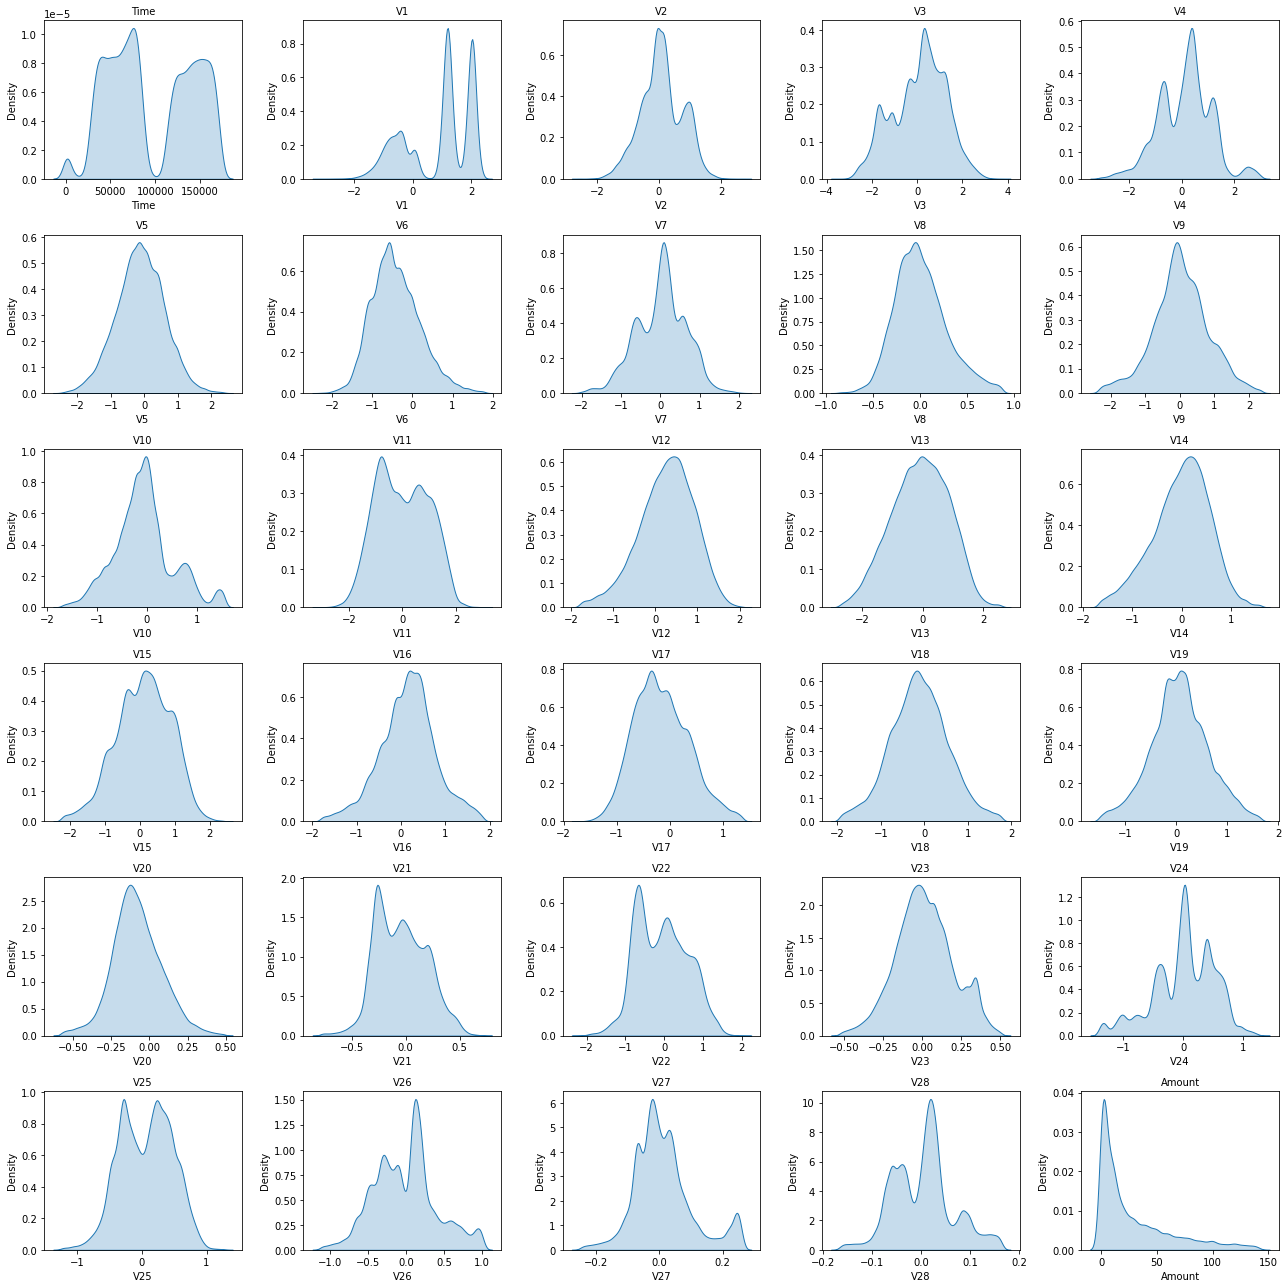

In [10]:
columns = data.drop(['Class'], axis=1).columns

fig, ax = plt.subplots(nrows=6, ncols=5, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for column in columns:
    idx += 1
    plt.subplot(6, 5, idx)
    sns.kdeplot(x=data[column],shade=True)
    plt.title(column, fontsize=10)
plt.tight_layout()

Notamos agora que temos uma distribuição mais clara nas variáveis. Mostrando então como a influência de outliers é prejudicial em nossa base.

###### Nova visualização dos outliers

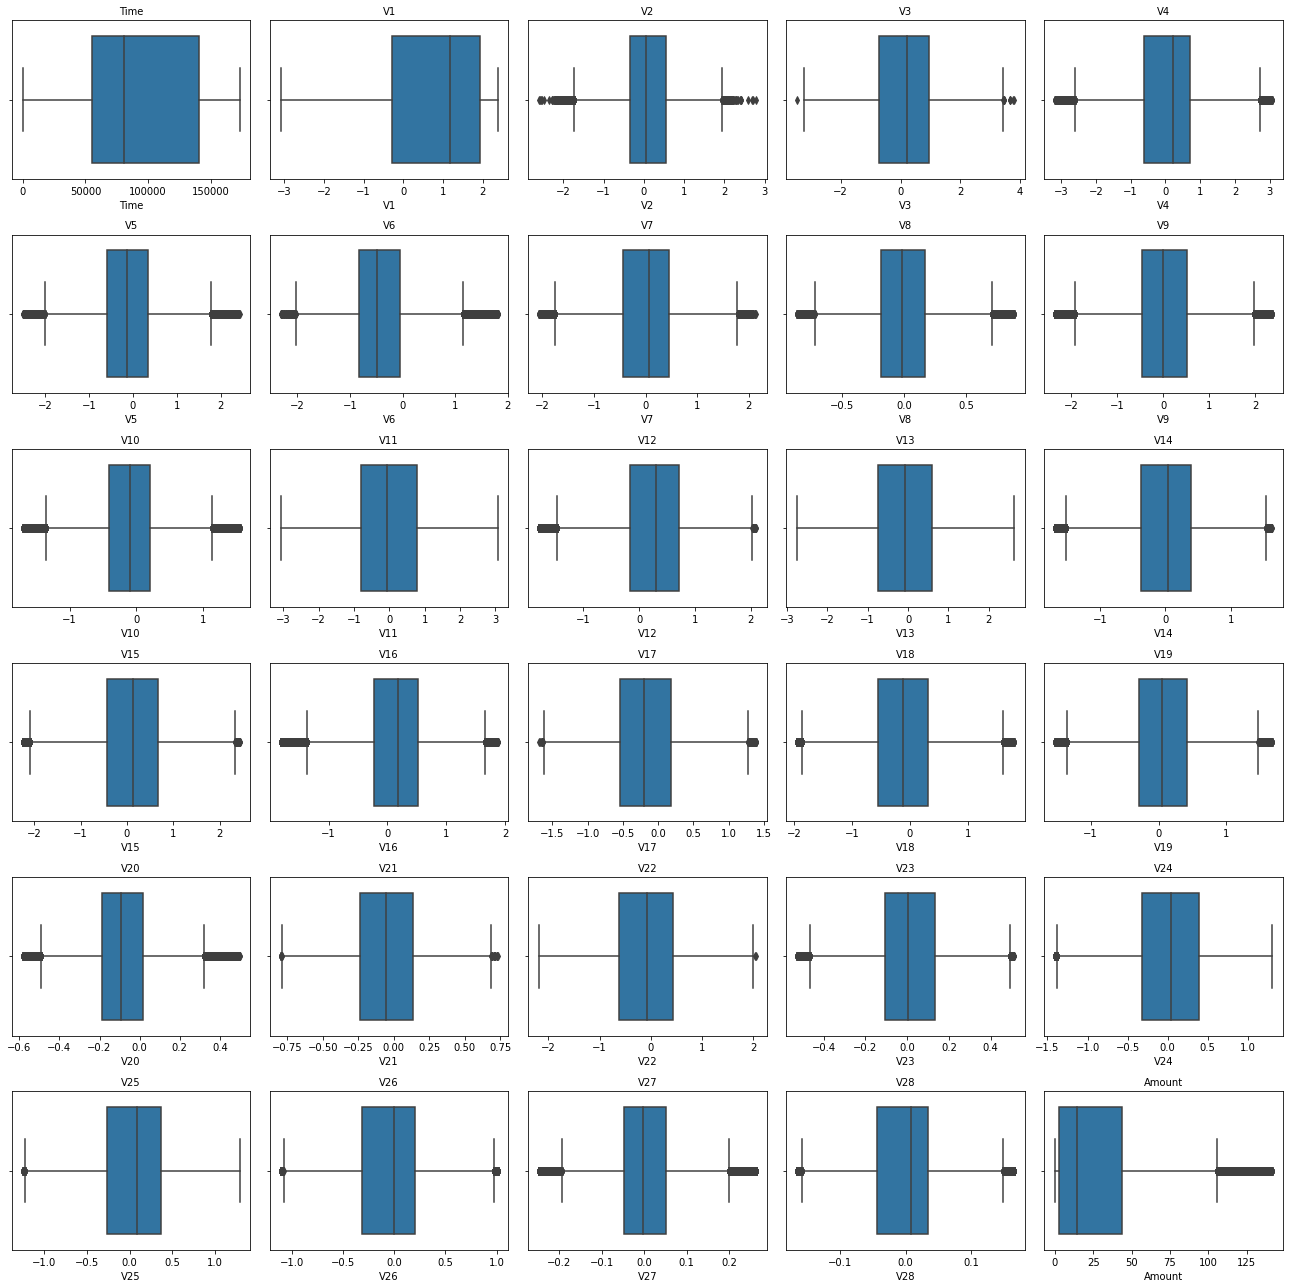

In [ ]:
columns = data.drop(['Class'], axis=1).columns

fig, ax = plt.subplots(nrows=6, ncols=5, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for column in columns:
    idx += 1
    plt.subplot(6, 5, idx)
    sns.boxplot(x=data[column], data=df)
    plt.title(column, fontsize=10)
plt.tight_layout()

Apesar que nas visualizações dos outliers aparecerem alguns valores descrepantes, o impacto deles não será tão grande igual antes.
Já que agora temos uma base de dados muito mais limpa e bem mais distribuída.

Toda essa limpeza irá ajudar na etapa de pré-processamento quando for aplicar o StandardScaler. Já que o mesmo é sensível aos outliers.

###### Novas correlações entre as variáveis

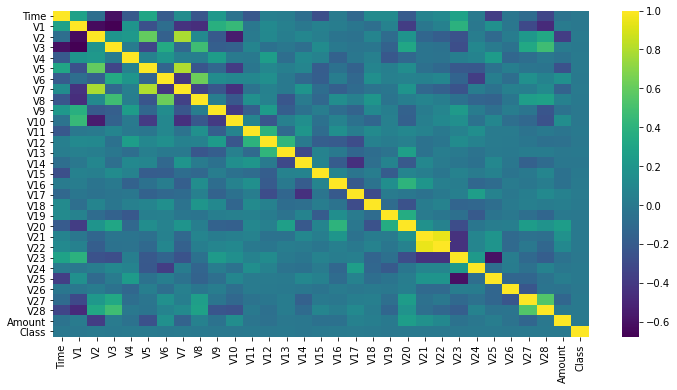

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), cmap='viridis');

De fato, toda nossa limpeza gerou um impácto de forma significativa em nossa base.
Se observamos o primeiro gráfico de correlações tivemos uma grande dificuldade em observar essas correlaçoes. 

Ao aplicarmos as técnicas de limpezas, podemos ver um pouco melhor algumas correlações positivas entre as variáveis.


###### Conclusãso da hipótese TH 1

O tratamento mostrou vários benefícios como:
uma base com menos ruídos, representações de correlações e distribuições mais claras.

Entretando a perda de valores foram consideraveis.   Nosso dataset original continham **284.807** registros. Após a limpeza o mesmo ficou com **174.685**, que conrresponde **61%** da nossa base de dados. Foram Cerca de `38%`da base  perdida nos tratamento.

##### TH2 Ao remover os outliers, qual seria o impácto nos modelos de machine learning ?

In [11]:
# Separando os dados em X e y
data_feature = pre_processing.split_feature_matrix_target_vector(data, 'Class')

Ao limpar o conjunto de dados, é chamado a função que separar a matriz X que são nossas variáveis e o array y onde se encontra os valores da variável target.

###### Aplicando Standard scaler nas colunas Time e Amount

In [12]:
colunas_processing = ['Amount', 'Time']
data_feature['X'] = pre_processing.standard_scaler(data_feature['X'],colunas_processing)

data_feature['X'].head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
1,-2.044080,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.780957
5,-2.044037,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.751760
6,-2.043994,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.712433
9,-2.043887,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.751462
12,-2.043865,1.249999,-1.221637,0.383930,-1.234899,-1.485419,-0.753230,-0.689405,-0.227487,-2.094011,1.323729,0.227666,-0.242682,1.205417,-0.317631,0.725675,-0.815612,0.873936,-0.847789,-0.683193,-0.102756,-0.231809,-0.483285,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,2.758760


Nesse passo realizamos o pré-processamento das colunas Time e Amount.

###### Tratando as classes desbalanceadas

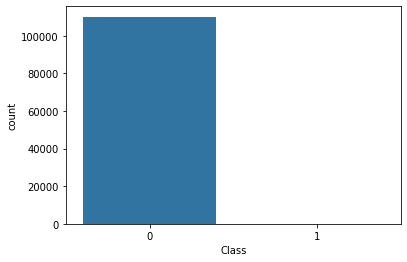

In [13]:
# plotando as classes desbalanceadas.
ax = sns.countplot(x=data_feature['y'])

A técnica que utilizaremos é o Undersampling. Que visa reduzir valores da classe majoritária deixando então o dataset mais igualitário. Para isso vamos usar o Near Miss.Consiste em reduzir de forma aleatória os exemplos da classe majoritária. Porém ele tenta manter a separabilidade entre as classes.

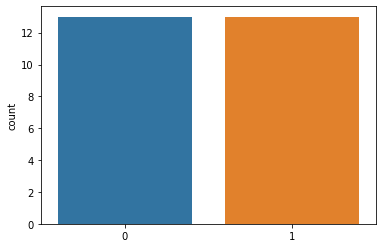

In [14]:
# Balancimento das vlasses preditoras
data_feature = pre_processing.under_sampling_nearMiss(data_feature);

# Exibindo gráfico com as classes balanceadas
ax = sns.countplot(x=data_feature['y']);

# dividindo novamentos os dados de X e y com as classes balanceadas
data_split = pre_processing.train_test_spint(data_feature)

Após aplicarmos a técnica de NearMiss, o algoritmo balanceou nosso dataset com a mesma quantidade de representações das classes preditora (0 - Normal, 1- fraude)

Nesse ponto já noramlizamos tudo. Deste a remoção de outliers, balaceamento de classes e o nosso StandarScaler para esclar nossos dados em uma escalar normal.

Partiremos agora para a criação dos modelos.

###### Criação dos modelos de machine learning

Nessa etapa iremos treinar, e realizar as predições dos nossos modelos. E usaremos a matriz de confusão e o relatório de classificação  para sabermos a perfomace dos nossos modelos. E calcular a métrica de AUC. para avaliar qual melhor modelo nesse teste de hipótese.

Uma observação, todos os modelos serão instaciados com parâmetros default. Ou seja parâmentros pré-definido pelo modelo.

In [15]:
# Treinando e realizando a predição dos modelos
data_predict = classification_model.predict_all_models(data_split)

Nesse ponto o modelo ja foi treinado e com a predição feita. 

A variável data_split possue os dados de `X_test, y_test, X_train e y_train`.

A variável data_predic possuem algumas informações como : `nome dos modelos, os modelos em si e suas predições`. Tudo isso será usado nas etapas afrente.

###### Relatório de classificação

In [16]:
classification_model.classification_report(data_predict['modelo_name'], data_split['y_test'],data_predict['y_pred'])

===Relatório de classificação===
Modelo: Logistic_regression
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.50      0.67         4

    accuracy                           0.71         7
   macro avg       0.80      0.75      0.71         7
weighted avg       0.83      0.71      0.70         7

Modelo: Gradient_boosting
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       1.00      0.25      0.40         4

    accuracy                           0.57         7
   macro avg       0.75      0.62      0.53         7
weighted avg       0.79      0.57      0.51         7

Modelo: Random_florest
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       1.00      0.25      0.40         4

    accuracy                           0.57         7
   macro avg      

In [17]:
classification_model.recall_score(data_predict, data_split['y_test'])

Modelo: Logistic_regression , Recall Score: 0.5 

Modelo: Gradient_boosting , Recall Score: 0.25 

Modelo: Random_florest , Recall Score: 0.25 

Modelo: Ada_boost , Recall Score: 0.25 

Modelo: Decission_tree , Recall Score: 0.25 

Modelo: GaussianNB , Recall Score: 0.75 



O relátório de classificação mostra o desempenho dos nossos modelos inclusive as métricas como Acuracy, Recall entre outras.

No modo geral os modelos não tiveram um bom desempenho. Pelo fato que no balanceamento de nossas classes terem somente 12 registro de cada (0= normal  e 1 = fraude).

São poucos amostras para os nossos modelos treinarem e serem generalista nas classificações. Nesse cenário o que teve melhor desempenho foi o algoritmo Gaussian com 75% de Recall.

###### Matrix de confusão

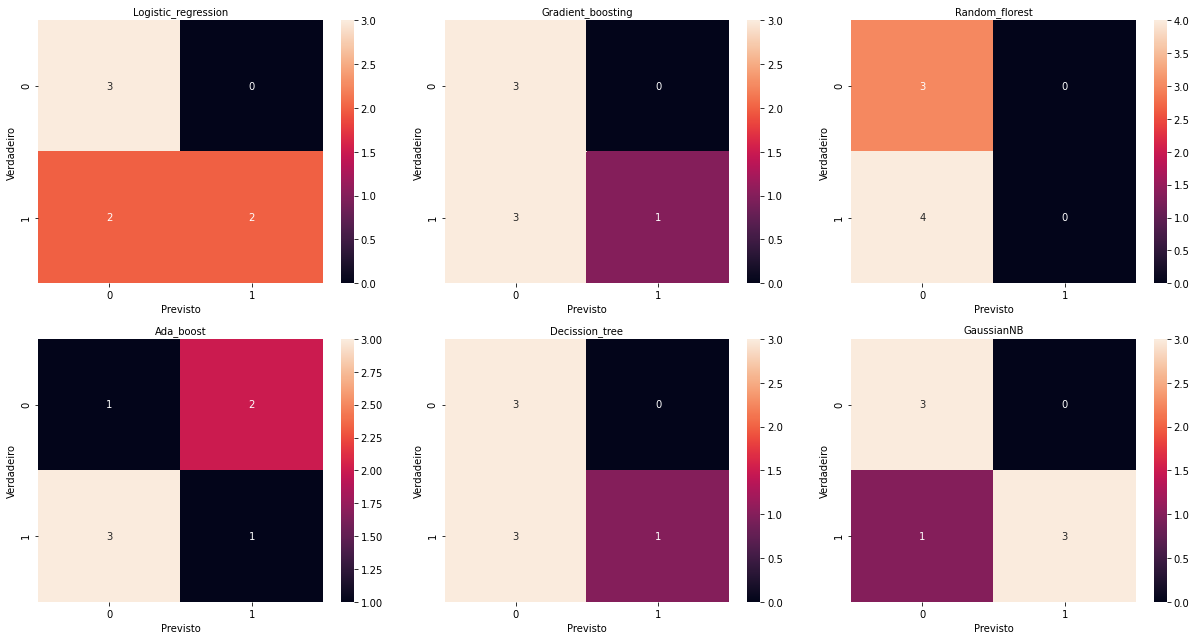

In [ ]:
classification_model.confusion_matrix(data_predict, data_split['y_test'])

Nessa matrix de confusão é exibido uma tabela onde é mostrado os valores verdadeiros e os valores predito.E podemos ver como o modelo erra ao classificar uma transação.

###### Avaliação AUC

In [18]:
evalue_model.roc_auc_score(data_split['y_test'], data_predict)

=== Avaliação de pesempenho AUC


Modelo: Logistic_regression
AUC: 0.75000

Modelo: Gradient_boosting
AUC: 0.62500

Modelo: Random_florest
AUC: 0.62500

Modelo: Ada_boost
AUC: 0.29167

Modelo: Decission_tree
AUC: 0.29167

Modelo: GaussianNB
AUC: 0.87500



Novamente a melhor avaliação foi para o Gaussian com 87%.

###### Conclusão da hipótese TH 2

Embora os dados estejam normalizados e com o menos ruidos de oltliers possíveis. A performace dos modelos não foram tão bons pelo fato deles não serem tão generalisados e pela falta de variáveis preditorias. Como se trata de um problema de classificação. É muito importante que nossos modelos sejam bem generalizados.

A maior desvantagem desse processo foi a perda de dados que ocasionou em poucas amostras nas variáveis preditoras. O conjunto de dados estar excelente, porém com poucas representações de classes.

### TH 3- Qual é o impacto de trinarmos os modelos com os outliers?

Agora faremos um cenário onde trataremos os oltliers do Time e Amount para aplicarmos o Standard Scaler. Somente nessas duas variáveis. Iremos repetir todos os passos do teste de hipótese 2 (TH 2) e veremos o impácto no final. 

In [ ]:
# Aplicando o pipe de limpeza de dados
data = (df.pipe(clean_data.copy_dataFrame)
          .pipe(clean_data.remove_outliers_columns,'Time')
          .pipe(clean_data.remove_outliers_columns, 'Amount'))

In [ ]:
data_feature = pre_processing.split_feature_matrix_target_vector(data,'Class')

Limpamos as duas variáveis Time e Amount e separamos a matrix X e array y respectivamente.

Sobre as distribuições das variáveis e os oltliers serão os mesmos apresentados na sessão de análise exploratória. Já que não trataremos o dataset todo.Portanto não é nescessário realizar a visualização gráfica do mesmos.

##### Aplicando Standard scaler nas colunas Time e Amount

In [ ]:
colunas_processing = ['Amount', 'Time']
data_feature['X'] = pre_processing.standard_scaler(data_feature['X'],colunas_processing)

data_feature['X'].head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.995729,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,2.718502
1,-1.995729,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.765550
3,-1.995708,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,2.099136
4,-1.995687,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.830290
5,-1.995687,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.742312


Mesmo processo feito na primeira hipótese aplicando o StandardScaller.

##### Balanceando as classes preditoras

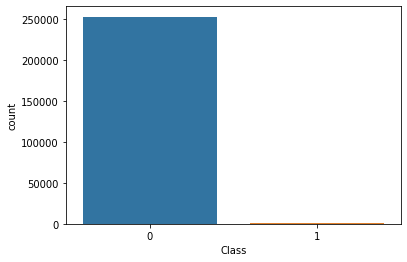

In [ ]:
# plotando as classes desbalanceadas.
ax = sns.countplot(x=data_feature['y'])

A diferença para o teste de hipótese 2 (TH 2) é que temos mais variáveis e um poquinho a mais da classe 1. mesmo estando desbalanceado.

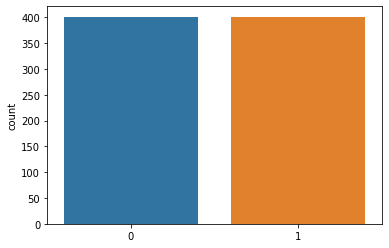

In [ ]:
# Balancimento das vlasses preditoras
data_feature = pre_processing.under_sampling_nearMiss(data_feature);

# Exibindo gráfico com as classes balanceadas
ax = sns.countplot(x=data_feature['y']);

# dividindo novamentos os dados de treino e test  com as classes balanceadas
data_split = pre_processing.train_test_spint(data_feature)

plt.savefig('distribuicao_balanceamento_v2.png', format='png')

Após aplicarmos a técnica de NearMiss, o algoritmo balanceou nosso dataset com a mesma quantidade de representações das classes preditora (0 - Normal, 1- fraude). Com isso ficamos com 400 amostras das nossas classes preditoras que é muito bom em realção ao teste de hipótese 2 (TH 2) que tinha somente 12. E aplicamos novamente o train test split com a escala feita e o balanceamento das classes.

##### Criação dos Modelos de machine learning

Nessa etapa iremos treinar, e realizar as predições dos nossos modelos. E usaremos a matriz de confusão e o relatório de classificação para sabermos a performance dos nossos modelos. E usar como métrica de avaliação o AUC para avaliar qual melhor modelo nesse teste de hipótese.

Uma observação, todos os modelos serão instanciados com parâmetros default. Ou seja parâmetros pré-definido pelo modelo


In [ ]:
# realizando o trainamento e a previçãoas transações
data_predict = classification_model.predict_all_models(data_split)

Nesse ponto o modelo ja foi trinado e com a prodição feita. 

A variável data_split possue os dados de `X_test, y_test, X_train e y_train`.

A variável data_predic possuem algumas informações como : `nome dos modelos, os modelos em si e suas predições`. Tudo isso será usado nas etapas afrente.

##### Relatório de clasificação

In [ ]:
classification_model.classification_report(data_predict['modelo_name'], data_split['y_test'],data_predict['y_pred'])

===Relatório de classificação===
Modelo: Logistic_regression
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       100
           1       0.99      0.89      0.94       101

    accuracy                           0.94       201
   macro avg       0.94      0.94      0.94       201
weighted avg       0.94      0.94      0.94       201

Modelo: Gradient_boosting
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       100
           1       0.97      0.91      0.94       101

    accuracy                           0.94       201
   macro avg       0.94      0.94      0.94       201
weighted avg       0.94      0.94      0.94       201

Modelo: Random_florest
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       100
           1       0.99      0.93      0.96       101

    accuracy                           0.96       201
   macro avg      

In [ ]:
classification_model.recall_score(data_predict,data_split['y_test'])

Modelo: Logistic_regression , Recall Score: 0.8910891089108911 

Modelo: Gradient_boosting , Recall Score: 0.9108910891089109 

Modelo: Random_florest , Recall Score: 0.9306930693069307 

Modelo: Ada_boost , Recall Score: 0.9405940594059405 

Modelo: Decission_tree , Recall Score: 0.9306930693069307 

Modelo: GaussianNB , Recall Score: 0.8613861386138614 



No geral, os modelos se saíram bem. Todos eles teveram uma acurácia acima dos 90% e o Recall acima dos 80%. Com destaque para o modelo Ada boost que obteve 94%.

Lembrando que o recall (revocação) é a porcentagem de valores positivos classificados corretamente.

##### Matrix de confusão

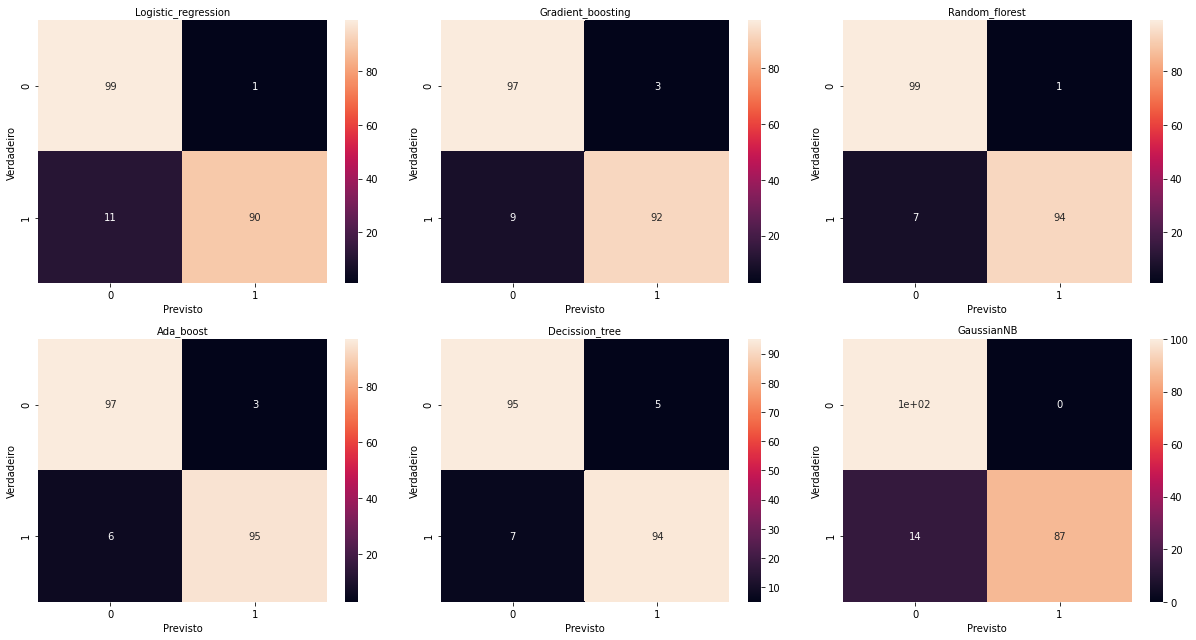

In [ ]:
classification_model.confusion_matrix(data_predict,data_split['y_test'])

Nessa plogatem de gráficos é exibida a matrix de confusão para cada modelo. Onde mostra os valores reais das transações e os valores preditos no qual o modelo classificou. Aqui é mostrado os falsos positivos quando o valor é x e o modelo classifica como y. 
Mas no geral tiveram um bom desempenho.

##### Avaliação AUC

In [ ]:
evalue_model.roc_auc_score(data_split['y_test'], data_predict)

=== Avaliação de pesempenho AUC


Modelo: Logistic_regression
AUC: 0.94054

Modelo: Gradient_boosting
AUC: 0.94045

Modelo: Random_florest
AUC: 0.96035

Modelo: Ada_boost
AUC: 0.95530

Modelo: Decission_tree
AUC: 0.94035

Modelo: GaussianNB
AUC: 0.93069



Nessa avaliação, é calculado o AUC para cada modelo treinado.
Tivemos um ótimo desempenho, todos acima dos 90% com destaque ao modelo de random florest que ficou ligeiramente acima do Ada boost com 96%.

#### Conclusão da hipótese TH 3

O experimento de não tratar os outliers fizeram que não perdêssemos dados e consequentimente amostras de variáveis preditoras. Tendo como resultado um ótimo desempenho dos modelos. 

### Conclusão das hipóteses.

Nesses teste, foi usado na separação de dados de treino e teste o parâmetro de random_state = 1, stratify.

Para termos sempre os mesmos dados nas hipóteses TH 2 e TH 3. Isso deixa as validação mais justa. Eliminando então a aleatoriedade dos dados ao executar os métodos em diferentes testes. 

Nos testes nos deram visões diferente de comportamentos em nossa base de dados. Tendo um impáctio muito forte nos modelos para a resolução do problema. Pela falta de representações das classes ou pelo fato de não tratar oltilers em nossas bases.

Isso ficou claro no balanceamento que fizemos nas classes. Onde tivemos 400 respresentações contra somente 12 do teste de hipótese 2 (TH2). 

Mesmo que nossa base tenha mais ruídos, e uma base não tão distribuída. Pelo simples fato que temos mais representações de valores de predições, todos os modelos performaram bem.
Para esse problema a melhor decisão é não remover esses dados. 

Pelo fato que nossa base já não ter classes balanceadas e ao tratar perderemos mais ainda dados que poderiam ajudar nossos modelos nas classificações.



## Conclusão

Os dados disponíveis, já tinha passado por algum tipo de pré-processamento. Ainda encontramos ruídos nos dados. O que fizemos foi remover alguns outliers nas colunas Time e Amount para aplicar o StandardScaler que não tinha aplicado a técnica previamente.

Realizamos teste de hipótese para tomar a decisão se poderiamos limpar esses ruídos (outliers) ou não. Para isso fizemos três teste que foram :

- TH 1 - A relevância de limpar os outliers:
tivemos um base limpa e bem distribuídas, porem perdemos muitas informações era revelantes para os modelos.

- TH 2 - Ao remover os outliers, qual seria o impácto nos modelos de machine learning:
Com a base tratada não tivemos um bom desempenho dos modelos. Foram 5 classificadores que tiveram resultados medianos com destaque para o modelo Gaussian com 87%.

- TH 3 Qual é o impacto de treinarmos os modelos com os outliers:

Aqui tivemos um ótimo resulto pelo fato de não perdemos iunformações. Foram 400 reapresentações de classes preditora com 12 do segundo teste. Com isso os modelos performaram muito bem. Com teste para o modelo de ramdom florest que tem 96% de AUC.

Todos os modelos foram treinados com 70% dos dados em treino e 30% em teste. com os parâmetros de random_state = 1, stratify.

Tendo como resultado a eliminação da aleatoriedade dos dados ao executar o métodos em diferentes testes (TH2 e TH3).Isso deixa a validação mais justa nesse cenário de tratar os outliers ou não. 

Nesse projeto o interessante foi não tratar os outliers. Pelo fato de perder informações e perder mais ainda as classes preditoras que já serem muito desbalanceadas.

Seguindo então a solução proposta pelo teste de hipótese TH 3, em modo geral  ambos modelos se saíram muito bem. Apesar que ambos foram criados com parâmetros pré-definidos.


Para determinar o melhor modelo nesse cenários, usamos a métrica de curva AUC. E o melhor nessa métrica com este cenário de configuração de modelos, foi Random flore  com 0.96% de AUC. Caso for utilizar hiperparâmetros nos modelos, pode ser que o resultado sejam diferentes em ambos testes de hipótese.

